In [1]:
no <- 1:4
name <- c("Apple", "Banana", "Peach", "Berry")
price <- c(500, 200, 200, 50)
qty <- c(5, 4, 3, 2)

In [6]:
# 백터를 이용하여 데이터프레임 만들기

fruit <- data.frame(번호=no,제품=name,가격=price,수량=qty)
fruit

번호,제품,가격,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [7]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [8]:
#메모리 형태로 파일 보관
#쓰다보니까 메모리가 부족해서 저장을 해야할때

save(no, fruit, name, file = "Rdata/fruit.txt")


In [11]:
rm(no, fruit, name)

Warning message in rm(no, fruit, name):
“객체 'no'를 찾을 수 없습니다”Warning message in rm(no, fruit, name):
“객체 'fruit'를 찾을 수 없습니다”Warning message in rm(no, fruit, name):
“객체 'name'를 찾을 수 없습니다”

In [10]:
ls()

[1] "price" "qty"

In [12]:
#메모리로 불러오기
load("Rdata/fruit.txt")

In [13]:
fruit

번호,제품,가격,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [14]:
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [15]:
# fruit를 csv로 저징하기( ,세퍼레이트)
# 저장하고 꼭 read 해봐

write.csv(fruit, "Rdata/fruit.csv")

In [19]:
fruit2 <- read.csv("Rdata/fruit.csv")

#X는 rowmanes

In [17]:
print(fruit)

  번호   제품 가격 수량
1    1  Apple  500    5
2    2 Banana  200    4
3    3  Peach  200    3
4    4  Berry   50    2


In [20]:
write.csv(fruit2, "Rdata/fruit2.csv")

In [21]:
read.csv("Rdata/fruit2.csv")
#쓰레기가 자꾸 늘어남...

X.1,X,번호,제품,가격,수량
1,1,1,Apple,500,5
2,2,2,Banana,200,4
3,3,3,Peach,200,3
4,4,4,Berry,50,2


In [22]:
# 저장시 주의사항 :  rewnames가 필요치 않으면 저장하지 말아야 한다.
write.csv(fruit, "Rdata/fruit3.csv", row.names=F)

In [23]:
read.csv("Rdata/fruit3.csv")

번호,제품,가격,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


---
# 세계 GDP 순위 데이터 정제 및 차트 만들기

In [29]:
GDP_ranking <- read.csv("Rdata/GDP.csv")
head(GDP_ranking, 10)
colnames(GDP_ranking)

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


[1] "X"                           "Gross.domestic.product.2018"
[3] "X.1"                         "X.2"                        
[5] "X.3"                         "X.4"

In [32]:
#데이터 정제
#1-4줄 삭제, (1,2,4,5)컬럼만 발췌

GDP_ranking2 <-GDP_ranking[-(1:4),-c(3,6)]
head(GDP_ranking2)

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [40]:
# 상위 15개국만 선별한다.
# 차트를 그릴껀데 다 안그릴꺼다
GDP_ranking15 <- head(GDP_ranking2, 15)
GDP_ranking15

#class(GDP_ranking2)
#rownames(GDP_ranking2)
#GDP_ranking2[,1:20]


,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [42]:
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP
#colnames(GDP_ranking15)
colnames(GDP_ranking15) <- c("Code", "Ranking", "Nation", "GDP")
GDP_ranking15

# 인덱스가 5번부터 시작하는데 이건 나중에 큰 문제를 일으킴.

[1] "Code"    "Ranking" "Nation"  "GDP"

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [44]:
#rownames 새로 구성하기
#c() 오 1부터 시작하는는데 범위를 안줬어 신기하다
rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [61]:
# 구조 확인하기
    
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : Factor w/ 15 levels " 1,223,809 ",..: 13 8 15 14 12 11 10 9 7 6 ...


In [46]:
#Factor의 갯수가(levels를 말하는거임) 15개가 정상일텐데 이상하다. -> 재구성해야함
GDP_ranking15$Code <- factor(GDP_ranking15$Code)

In [56]:
ncol(GDP_ranking15)

[1] 4

In [62]:
#for문을 이용한 factor 조정


for(i in 1:ncol(GDP_ranking15)){
    GDP_ranking15[,i] = factor(GDP_ranking15[,i])
}
    str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : Factor w/ 15 levels " 1,223,809 ",..: 13 8 15 14 12 11 10 9 7 6 ...


In [69]:
library(stringr)

In [74]:
# 그래프를 그려야 하니까 GDP를 숫자로 바꿔줌


GDP_ranking15$GDP = as.numeric(as.numeric(str_replace_all(GDP_ranking15$GDP, ',' , '')))
#선생님이 하신것.
#wapping coding
#GDP_ranking15$GDP <- as.numeric(as.numeric(str_remove_all(GDP_ranking15$GDP, ',' , '')))
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


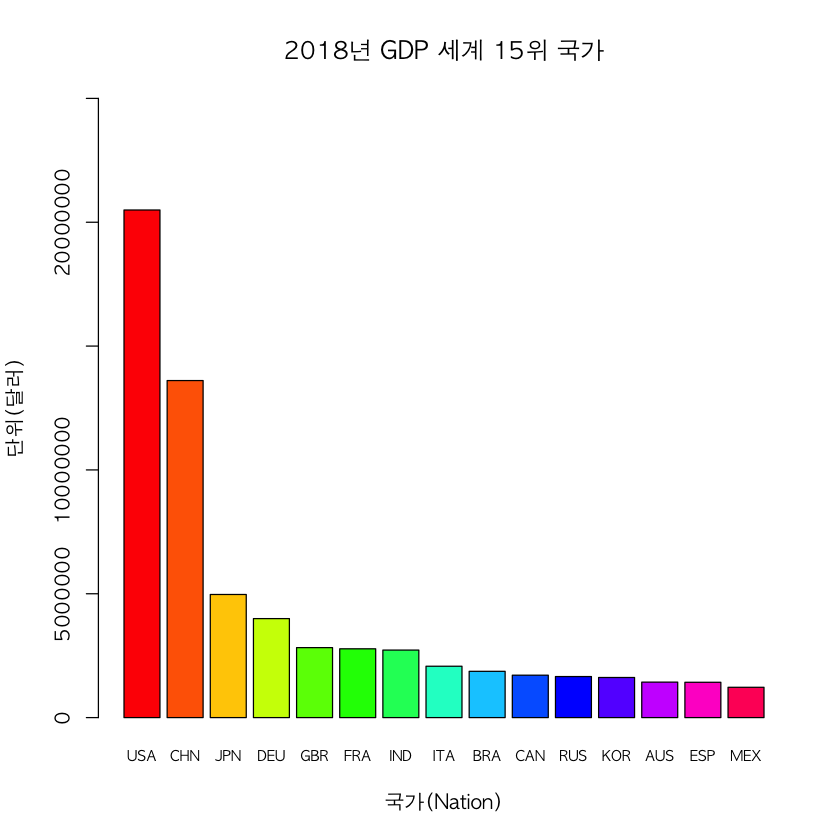

In [137]:
#숫자는 단위를 써야함
options(scipen = 100)
options(warn = -1) #
par(family = "AppleGothic") # 맥은 폰트 지정해줘야함.

barplot(GDP_ranking15$GDP, # GDP상위 15개국 Data
       main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        #ylab = "단위(달러)",
        ylab = "단위(달러)",
        #names = GDP_ranking15$Nation, #백터 이름주기 names #code로 부르니까 이름이 안보임.
        names = GDP_ranking15$Code,  #나라 이름은 Code가 있네! 이걸로 불러오기!
        cex.names = 0.7, # 이름이 다 안들어와서 폰트 사이즈 조정
        #col = c('red',"blue","pink") #반복되는걸 보니 백터구나!
        col = rainbow(nrow(GDP_ranking15)),#data가 몇개인지를 알려줘야함 #무지개색 그래프
        ylim = c(0, 25000000)
       )


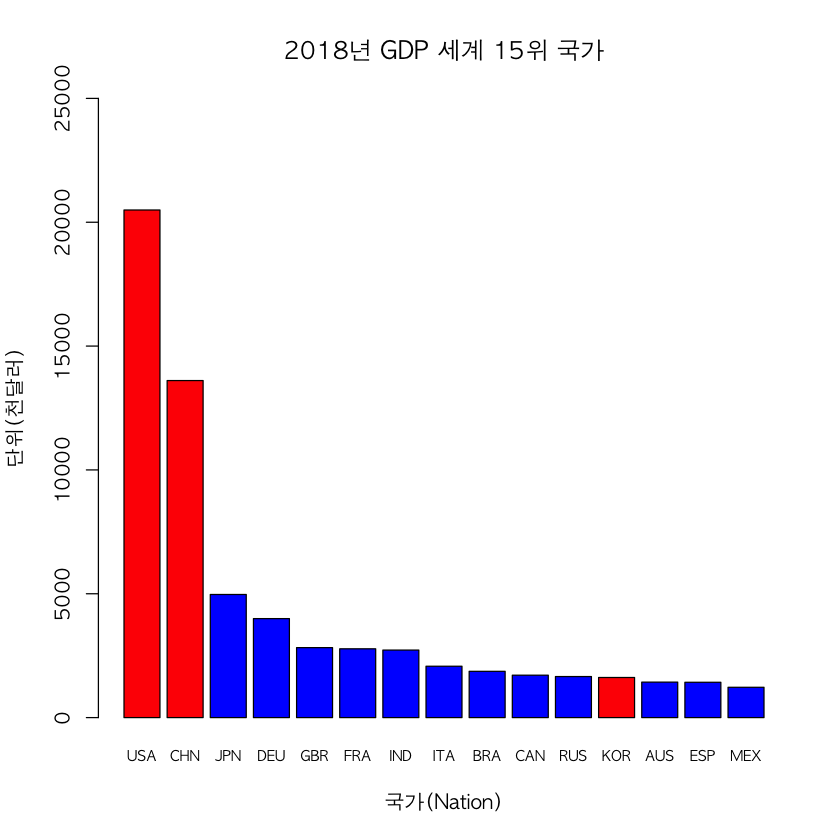

In [121]:
par(family = "AppleGothic")
barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
       main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,  
        cex.names = 0.7, 
        col = c("red","red",rep("blue",9),"red",rep("blue",3)),
        ylim = c(0, 25000)
       )

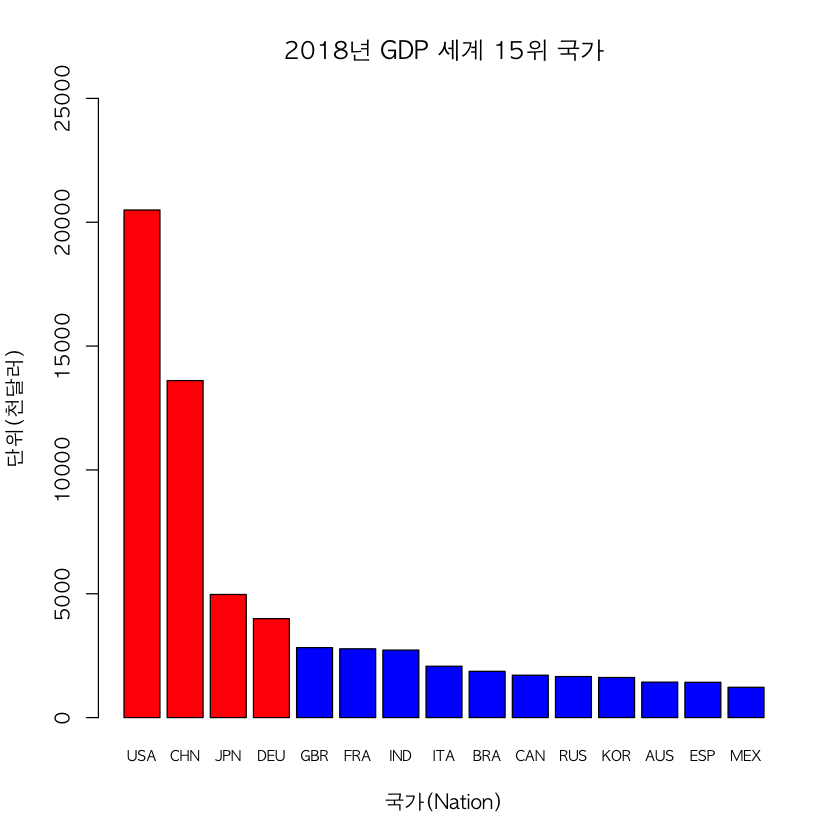

In [135]:
# GDP가 3000이상인 국가만 빨간색으로 표시하기

par(family = "AppleGothic")
barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
       main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,  
        cex.names = 0.7, 
        col = ifelse(GDP_ranking15$GDP/1000 >= 3000,"red","blue"),
        ylim = c(0, 25000)
       )

---
# *****데이터 처리

### 데이터 정렬
데이터 구성에서 무조건 사용함

In [138]:
# library 불러오기
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [140]:
# Sepal.Length 기준으로 오름차순 정렬하기
# SQL = order by

#arrange
head(arrange(iris, Sepal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [142]:
# Sepal.Length 기준으로 정렬후(2차 정렬) 동일한 크기를 가진 데이터 발생시 Petal.Length기준으로 오름차순으로 정렬

head(arrange(iris, Sepal.Length, Petal.Length))


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa


In [145]:
# Sepal.Length 기준으로 내일차순 정렬 : desc(필요한 컬럼)
#SQL = order by DESC
head(arrange(iris, desc(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [155]:
# Sepal.Length 기준으로 내림차순 정렬후 Sepal.Length 와 Sepal.Width만 보기

#arrange(iris, desc(Sepal.Length))[1:5 ,c("Sepal.Length", "Sepal.Width")]
head(arrange(iris[, 1:2], desc(Sepal.Length)))

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


## 샘플링(Sampling)

- **샘플링한 데이터가 모집단의 의미를 가지고 있어야함
- 원래 데이터 크기 : 모집단
- 너무 커서 일부분만 가져와 
- 대표값을 가져오는것
- 특징을 알아야 샘플링을 할수 있음
- 그룹별로 해줄줄 알아야함
- 각각의 그룹별로 공평하게 가져와야함!
- 공부(trainning : 70% )하는거랑 시험(test : 30%)보는거랑 데이터를 나누는게 샘플링

In [162]:
# 랜덤 샘플링(중복값을 허용하지 않음)
sample(1:45 ,6)

[1] 20 13 34 41 38 31

In [163]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [167]:
#70%만 가져오겠다.
samp <- sample(1: nrow(iris), nrow(iris)*0.7)
samp

[1]   7   2  74  40  14  73  91 134  53  56 127  24 132 119 126 128  38  37
 [19]  63   5  78  88 107  49  59 148  48  11 112  92 133  21 131 115 100  95
 [37] 145  33  13  79  26  35  71 113 110  60 139  66  39  76  16  57  85  19
 [55] 143  75  69  86 104  44 118  46   9 103  15  89 123 114 102  62  32 124
 [73] 138   1  29  64  12  34  18  94 147   6  87 105 109  61  27  50 130 149
 [91] 111  52 141  81 129  58 116  54 146  51  82  84   4  22  67

In [169]:
# 샘플링
irisSamp <- iris[samp, ]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7,4.6,3.4,1.4,0.3,setosa
2,4.9,3.0,1.4,0.2,setosa
74,6.1,2.8,4.7,1.2,versicolor
40,5.1,3.4,1.5,0.2,setosa
14,4.3,3.0,1.1,0.1,setosa
73,6.3,2.5,4.9,1.5,versicolor


In [170]:
#샘플링을 한건지 안한건지 어떻게 아느냐!
#iris 는 Species가 1:1:1 인데 샘플링은 다른거면 망한것
summary(irisSamp)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.100   Min.   :0.100   setosa    :34  
 1st Qu.:5.200   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:36  
 Median :5.800   Median :3.00   Median :4.500   Median :1.400   virginica :35  
 Mean   :5.874   Mean   :3.06   Mean   :3.808   Mean   :1.221                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

In [172]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [173]:
table(irisSamp$Species)


    setosa versicolor  virginica 
        34         36         35 

In [174]:
#iris Samplingt시 Species 별로 Samlpling
#각각의 그룹별로 공평하게 가져와야함!

samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

In [175]:
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [176]:
# Trainning Data와 Test Data분리하기
#나중엔 3개로 분리해야함(데이터가 큼)

iris.train <- iris[samp,]
iris.test <- iris[-samp, ]

In [179]:
# 잘 나눠져있나 확인 
#평균값 확인하고!

summary(iris.train)
summary(iris.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.200   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.500   Median :1.400  
 Mean   :5.915   Mean   :3.085   Mean   :3.816   Mean   :1.215  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.900  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.600   Median :3.000   Median :4.100   Median :1.300  
 Mean   :5.676   Mean   :2.993   Mean   :3.622   Mean   :1.162  
 3rd Qu.:6.300   3rd Qu.:3.200   3rd Qu.:4.900   3rd Qu.:1.800  
 Max.   :7.700   Max.   :3.900   Max.   :6.300   Max.   :2.500  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                


## 부분집합

- sumset

In [195]:
#iris에서 Species가 setosa인것만 추출하여 iris_setosa라는 데이터 프레임 만들기
# factor.... 다시 공부하자 
iris_setosa <- subset(iris, Species == 'setosa')
tail(iris_setosa)

str(iris_setosa)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
45,5.1,3.8,1.9,0.4,setosa
46,4.8,3.0,1.4,0.3,setosa
47,5.1,3.8,1.6,0.2,setosa
48,4.6,3.2,1.4,0.2,setosa
49,5.3,3.7,1.5,0.2,setosa
50,5.0,3.3,1.4,0.2,setosa


'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [196]:
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [219]:
#iris에서 sepcies가 versicolor 인것만 추출하여  iris_versicolor라는 데이터프레임 만들기
iris_versicolor <- subset(iris, Species == 'versicolor')
tail(iris_versicolor)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
95,5.6,2.7,4.2,1.3,versicolor
96,5.7,3.0,4.2,1.2,versicolor
97,5.7,2.9,4.2,1.3,versicolor
98,6.2,2.9,4.3,1.3,versicolor
99,5.1,2.5,3.0,1.1,versicolor
100,5.7,2.8,4.1,1.3,versicolor


In [220]:
# setosa랑 versicolor비교 Factor 수정하기
str(iris_setosa)
str(iris_versicolor)
iris_versicolor$Species <- factor(iris_versicolor$Species)
str(iris_versicolor)
tail(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...
'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : n

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
95,5.6,2.7,4.2,1.3,versicolor
96,5.7,3.0,4.2,1.2,versicolor
97,5.7,2.9,4.2,1.3,versicolor
98,6.2,2.9,4.3,1.3,versicolor
99,5.1,2.5,3.0,1.1,versicolor
100,5.7,2.8,4.1,1.3,versicolor


In [222]:
#index가 50부터 시작이네! 1부터 시작으로 바꿔주기
print(head(iris_versicolor))

   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
51          7.0         3.2          4.7         1.4 versicolor
52          6.4         3.2          4.5         1.5 versicolor
53          6.9         3.1          4.9         1.5 versicolor
54          5.5         2.3          4.0         1.3 versicolor
55          6.5         2.8          4.6         1.5 versicolor
56          5.7         2.8          4.5         1.3 versicolor


In [224]:
#print로 출력해야 row번호가 보임

rownames(iris_versicolor) <- c()
print(head(iris_versicolor))

  Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1          7.0         3.2          4.7         1.4 versicolor
2          6.4         3.2          4.5         1.5 versicolor
3          6.9         3.1          4.9         1.5 versicolor
4          5.5         2.3          4.0         1.3 versicolor
5          6.5         2.8          4.6         1.5 versicolor
6          5.7         2.8          4.5         1.3 versicolor


In [227]:
#iris에서 Species가 setosa이고 Sepal.Length가 5보다 큰 Sample(Data)의 갯수는?

nrow(subset(iris, Species== 'setosa' & Sepal.Length >5))

[1] 22

In [230]:
#subset으로 컬럼 지우기
# 행 지우는건 안됨
head(subset(iris, select = -Species))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


---
## ***그룹연산 함수
- '~'연산자(틸트?)
- y = ax == y ~ x
- 분석할때 엄청 많이 씀

In [235]:
# iris에서 Species기준으로 Sepal.Width의 평균 구하기
#Species 를 기준으로 iris에서 Sepal.Width의 mean 구하기
aggregate(Sepal.Width ~ Species, iris, mean)

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


---
# 서울시 교통사고 조사 데이터셋

In [238]:
#데이터셋을 불러와서 seoul이라는 변수에 넣기

seoul <- read.csv("Rdata/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [239]:
tail(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [240]:
str(seoul)
#서울시 25개구..였구나... 상식...

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [259]:
colnames(seoul)[1]

[1] "년도"

In [255]:
#Na 확인 : 내가 한거
#ncol(seoul)
#colnames(seoul)
#colnames(seoul)[1]

#for(i in 1:ncol(seoul)){
    #colnames(seoul)[1,] 여기서 안나왔음 그냥 [1]하나만 적으면 나왔넹;;
#    cat(colnames(seoul)[1,],sum(is.na(seoul[ , i])))
#}

[1] 6

[1] "년도"     "월"       "자치구명" "발생건수" "사망자수" "부상자수"

0

In [261]:
#Na 확인 : 선생님
#sum(is.na(seoul$년도))
#colnames(seoul)[1]
for(i in 1:ncol(seoul)){
cat(colnames(seoul)[i],":",sum(is.na(seoul[,i])),"\n")
    }

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


In [241]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [268]:
# 카운트가 년도별로 똑같은지 월별로 똑같은지를 확인해야함
# 그래야 분석할수 있음
# '컬럼'별 데이터 확인
# 발생건수,사망자수,부상자수는 summary에서 확인했어

table(seoul$년도)
table(seoul$월)
table(seoul$자치구명)



2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

In [277]:
# 자치구별 발생건수 평균
#class(seoul$발생건수)

regionAcc.mean <- aggregate(발생건수 ~ 자치구명, seoul, mean)
head(regionAcc.mean,3)



자치구명,발생건수
강남구,306.3611
강동구,118.5370
강북구,101.7870


In [279]:
#regionAcc.mean을 발생건수 기준으로 내림차수 정렬하기

head(arrange(regionAcc.mean, desc(발생건수)),6)

자치구명,발생건수
강남구,306.3611
송파구,224.7593
영등포구,194.6481
서초구,186.4815
동대문구,153.6481
강서구,145.4722
